Run the following code to print the difference between root mean squared errors of the two models, in both the train sample and in the test sample.

In [9]:
# pip install sklearn

In [10]:
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
preurl = "https://www.cars.com/shopping/results/?"
posturl = "&page_size=20&dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=mercedes_benz&maximum_distance=all&mileage_max=60000&models[]=mercedes_benz-amg_gt_53&models[]=mercedes_benz-amg_gt_63&models[]=mercedes_benz-amg_s&models[]=mercedes_benz-amg_s_63&models[]=mercedes_benz-amg_s_65&models[]=mercedes_benz-maybach_gls_600&models[]=mercedes_benz-maybach_s&models[]=mercedes_benz-maybach_s_550&models[]=mercedes_benz-maybach_s_560&models[]=mercedes_benz-maybach_s_580&models[]=mercedes_benz-maybach_s_650&sort=best_match_desc&stock_type=used&year_max=&year_min=&zip=85281"

url_list = []

n = 15
for i in range(n):
    url = preurl + "page=" + str(i+1) + posturl
    url_list.append(url)

In [12]:
cars = []
miles = []
price = []

for i in range(n):
    print('working on page'+str(i+1))
    page = requests.get(url_list[i])
    soup = BeautifulSoup(page.content, 'html.parser')
    
    car_tags = soup.find_all('h2', attrs={'class': 'title'})
    miles_tags = soup.find_all('div', attrs={'class': 'mileage'})
    price_tags = soup.find_all('span', attrs={'class': 'primary-price'})
    
    for j in range(len(car_tags)):
        cars.append(car_tags[j].get_text())
        miles.append(miles_tags[j].get_text())
        price.append(price_tags[j].get_text())

working on page1
working on page2
working on page3
working on page4
working on page5
working on page6
working on page7
working on page8
working on page9
working on page10
working on page11
working on page12
working on page13
working on page14
working on page15


In [13]:
df = pd.DataFrame({'Car': cars, 'Mileage': miles, 'Price': price})

df.to_csv('mycars-raw.csv', header=True, index=False)

len(df)

299

In [14]:
rawdf = pd.read_csv('mycars-raw.csv')

In [15]:
rawdf.head(5)
df = rawdf
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True)
df['Mileage'] = df['Mileage'].replace({',': '', 'mi.': ''}, regex=True)
df['Year'] = [int(df['Car'][i][:4]) for i in range(len(df))]
df['Car'] = [df['Car'][i][19:] for i in range(len(df))]
df

,Car,Mileage,Price,Year
0,2018 Mercedes-Benz AMG S 63 Base 4MATIC,19211,123500,2018
1,2018 Mercedes-Benz AMG S 63 Base 4MATIC,27167,127848,2018
2,2016 Mercedes-Benz AMG S AMG S 63 4MATIC,48098,83990,2016
3,2016 Mercedes-Benz AMG S AMG S 63 4MATIC,27675,81990,2016
4,2021 Mercedes-Benz AMG GT 53 Base,3097,115999,2021
...,...,...,...,...
294,2016 Mercedes-Benz Maybach S S 600,27940,101995,2016
295,2016 Mercedes-Benz Maybach S S 600,31160,95995,2016
296,2019 Mercedes-Benz AMG GT 63 S 4-Door,8748,159957,2019
297,2017 Mercedes-Benz AMG S 63 Base 4MATIC,11868,115990,2017


In [51]:
df = pd.DataFrame({'Car': df['Car'], 'Year': df['Year'], 'Mileage': df['Mileage'], 'Price': df['Price']})


In [50]:
df['Price'][154] = 'Not Priced'
df['Price'][155] 

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


'79850'

In [55]:
nopricedf = df[df.Price.str.contains('Not')]
cleandf = df[~df.Price.str.contains('Not')]

In [70]:
print(len(df), len(nopricedf), len(cleandf))
cleandf

299 3 296


,Car,Year,Mileage,Price
0,AMG S 63 Base 4MATIC,2018,19211,123500
1,AMG S 63 Base 4MATIC,2018,27167,127848
2,AMG S AMG S 63 4MATIC,2016,48098,83990
3,AMG S AMG S 63 4MATIC,2016,27675,81990
4,AMG GT 53 Base,2021,3097,115999
...,...,...,...,...
294,Maybach S S 600,2016,27940,101995
295,Maybach S S 600,2016,31160,95995
296,AMG GT 63 S 4-Door,2019,8748,159957
297,AMG S 63 Base 4MATIC,2017,11868,115990


In [99]:
cleandf[['Year', 'Mileage', 'Price']] = cleandf[['Year', 'Mileage', 'Price']].apply(pd.to_numeric)

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [106]:
[print(type(cleandf.iloc[0, i])) for i in range(0,4)]

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


[None, None, None, None]

In [176]:
X = cleandf[['Year', 'Mileage']].to_numpy()


In [177]:
y = cleandf['Price'].values

print(X[0:5], '\n', y[0:5].reshape(-1,1), '\n', X.shape, '\n', y.shape)


[[ 2018 19211]
 [ 2018 27167]
 [ 2016 48098]
 [ 2016 27675]
 [ 2021  3097]] 
 [[123500]
 [127848]
 [ 83990]
 [ 81990]
 [115999]] 
 (296, 2) 
 (296,)


Text(0, 0.5, 'Price')

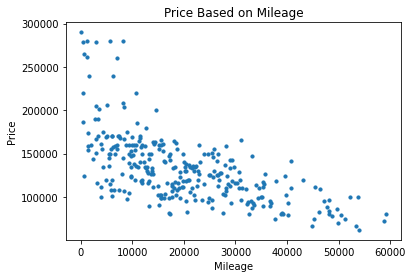

In [179]:
plt.scatter(X[:,1], y, s=10)
plt.title('Price Based on Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')

In [181]:
x = X[:,1]
x.shape = (len(x), 1)

In [190]:
mod0 = LinearRegression().fit(x,y)
b = (mod0.intercept_, mod0.coef_)
print(b)

(171887.8010226665, array([-1.94939707]))
